In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

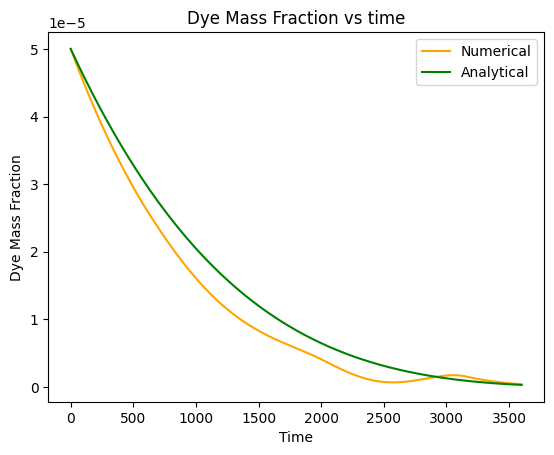

In [17]:
V0 = 5.0 
C0 = 50e-6 
Fin = 0.004 
Fout = 0.005 
t_final = 3600

def model(t, y):
    C, V = y
    dV = Fin - Fout 
    dC = -(Fout * C) / V
    return [dC, dV]

y0 = [C0, V0]

t_span = (0, t_final) 
t_eval = np.linspace(0, t_final, 1000)

solution = solve_ivp(model, t_span, y0, t_eval=t_eval)
concentration_sol = solution.y[0]
analytical_solve = C0 * ((V0 - 0.001 * t_eval) / V0)**4

plt.plot(t_eval, concentration_sol, label='Numerical', color='orange')
plt.plot(t_eval, analytical_solve, label='Analytical', color='green')
plt.xlabel('Time')
plt.ylabel('Dye Mass Fraction')
plt.legend()
plt.title('Dye Mass Fraction vs time')
plt.show()